##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import os
import xlsxwriter
from PIL import Image

pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

ModuleNotFoundError: No module named 'seaborn'

## Data

In [2]:
fname = 'Lithuanian_wines_scored_v6.xlsx'

In [3]:
df = pd.read_excel(fname)

In [4]:
df.head(1)

,wine_id,merchant_name,price,price_avg,url,wine_name,wine_type_id,region,country,winery,region_style,style_body,acidity,grape_1,grape_2,grape_3,ratings_count_wine,ratings_average_wine,is_natural,image_vivino,critics_score_avg,style,score,vivino_link,winery_wines_count,winery_ratings_sum
0,1536432,balticxl.lt,10.0,11.0,https://www.balticxl.lt/khareba-kindzmarauli,Kindzmarauli (ქინძმარაული) Semi-Sweet Red,Red,Kindzmarauli,Georgia,Khareba,NaN,NaN,NaN,NaN,NaN,NaN,2247,4.4,NaN,//images.vivino.com/thumbs/0HWfewO1QEao_Gc-qnW...,NaN,Fruity Red,0.9,https://www.vivino.com/w/1536432,53,22844


## Preprocessing

### Merchant

In [5]:
supermarkets = ['Maxima', 'Rimi', 'Iki']

In [6]:
vinotheques = ['balticxl.lt', 'portugaliskas.lt', 'Vyno Meka',
               'Vyno Guru', 'Vynoklubas.lt', 'winemaker.lt',
               'vidurzemiodelikatesai.lt', 'vynoteka', 'primo-vino.eu',
               'vinsdefrance.lt', 'vynokelias.lt', 'wineandsmile.lt',
               'vynaskonjakas.lt', 'Bottlery', 'vynopolis.lt',
               'baltasdobilas.com', 'sampane.lt', 'Airate', 'zenoteca.lt',
               'miammiam.lt', 'Michaelson boutique ', 'winelovers.lt']

In [7]:
Lithuania = supermarkets + vinotheques

In [8]:
df.loc[:, 'merchant'] = df['merchant_name'].apply(lambda s:
                                                  'supermarkets' if s in supermarkets else 'vinotheques')

### Style

In [9]:
df['style'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4322 entries, 0 to 4321
Series name: style
Non-Null Count  Dtype 
--------------  ----- 
4322 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


In [10]:
df['style'].describe()

count        4322
unique         17
top       Big red
freq          798
Name: style, dtype: object

In [11]:
df['style'].value_counts()

Big red                798
Smooth red             590
Sparkling              526
Crisp white            501
Fruity white           414
Fruity red             413
Sparkling              193
Rose                   184
Bubbles                142
Fruity White           103
Crisp White             97
Rich white              92
Dessert & fortified     89
Fruity Red              69
Smooth Red              63
Dessert & Fortified     44
Jeres                    4
Name: style, dtype: int64

In [12]:
df.loc[:, 'style'] = df['style'].apply(lambda s: ' '.join([i.title() for i in s.split()]))

In [13]:
df['style'].value_counts()

Big Red                798
Sparkling              719
Smooth Red             653
Crisp White            598
Fruity White           517
Fruity Red             482
Rose                   184
Bubbles                142
Dessert & Fortified    133
Rich White              92
Jeres                    4
Name: style, dtype: int64

In [14]:
pop_style = list(dict(df['style'].value_counts()).keys())

### Region style

In [15]:
df['region_style'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4322 entries, 0 to 4321
Series name: region_style
Non-Null Count  Dtype 
--------------  ----- 
3607 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


In [16]:
df['region_style'].describe()

count                 3607
unique                 219
top       French Champagne
freq                   337
Name: region_style, dtype: object

In [17]:
df['region_style'].value_counts()

French Champagne                           337
Southern Italy Red                         172
Southern Italy Primitivo                   141
Italian Prosecco                           127
Southern Italy White                       104
Spanish Cava                               104
Spanish Red                                 95
German Riesling                             86
Spanish Rioja Red                           83
Northern Italy Red                          80
Northern Italy White                        65
French Crémant                              61
Languedoc-Roussillon Red                    58
Tuscan Red                                  56
Southern Rhône Red                          45
Argentinian Malbec                          42
Italian Barolo                              41
Central Italy White                         41
Chilean Cabernet Sauvignon                  40
Portuguese Alentejo Red                     39
Californian Zinfandel                       38
Bordeaux Red 

In [18]:
df.loc[:, 'region_style'] = df['region_style'].fillna('other')

In [19]:
df['region_style'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4322 entries, 0 to 4321
Series name: region_style
Non-Null Count  Dtype 
--------------  ----- 
4322 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


In [20]:
df['region_style'].describe()

count      4322
unique      220
top       other
freq        715
Name: region_style, dtype: object

In [21]:
df['region_style'].value_counts()

other                                      715
French Champagne                           337
Southern Italy Red                         172
Southern Italy Primitivo                   141
Italian Prosecco                           127
Spanish Cava                               104
Southern Italy White                       104
Spanish Red                                 95
German Riesling                             86
Spanish Rioja Red                           83
Northern Italy Red                          80
Northern Italy White                        65
French Crémant                              61
Languedoc-Roussillon Red                    58
Tuscan Red                                  56
Southern Rhône Red                          45
Argentinian Malbec                          42
Italian Barolo                              41
Central Italy White                         41
Chilean Cabernet Sauvignon                  40
Portuguese Alentejo Red                     39
Californian Z

In [22]:
pop_region_style = list(dict(df['region_style'].value_counts()).keys())[1:21]

### Country

In [23]:
df['country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4322 entries, 0 to 4321
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
4322 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


In [24]:
df['country'].describe()

count      4322
unique       27
top       Italy
freq       1305
Name: country, dtype: object

In [25]:
df['country'].value_counts()

Italy              1305
France             1110
Spain               648
Portugal            283
Chile               190
Germany             141
United States       107
Austria              99
Argentina            92
Australia            82
South Africa         82
New Zealand          78
Georgia              56
Moldova               9
Israel                8
Armenia               6
Hungary               6
Luxembourg            4
Romania               4
China                 3
North Macedonia       2
United Kingdom        2
Slovakia              1
Espagne               1
Lebanon               1
Bulgaria              1
Greece                1
Name: country, dtype: int64

In [26]:
pop_country = list(dict(df['country'].value_counts()).keys())

### Price

In [27]:
def get_price_group_l1(x):
    if x<=7:
        return '0-7.0' 
    
    elif (x>7)and(x<=10):
        return '7.0-10.0'
    
    elif (x>10)and(x<=13.25):
        return '10.0-13.25'
    
    elif (x>13.25)and(x<=17.34):
        return '13.25-17.34'
    
    elif (x>17.34)and(x<=24.05):
        return '17.34-24.05'
    
    elif (x>24.05)and(x<=40.8):
        return '24.05-40.8'
    
    elif (x>40.8)and(x<=151.01):
        return '40.8-151.01'

df['price_group_l1'] = df['price_avg'].apply(lambda x: get_price_group_l1(x))

In [28]:
def get_price_group_l2(x):
    if x<=7:
        return '00-07' 
    
    elif (x>7)and(x<=10):
        return '07-10'
    
    elif (x>10)and(x<=15):
        return '10-15'
    
    elif (x>15)and(x<=20):
        return '15-20'
    
    elif (x>20)and(x<=25):
        return '20-25'
    
    elif (x>25)and(x<=40):
        return '25-40'
    else:
        return '40+'

df['price_group_l2'] = df['price'].apply(lambda x: get_price_group_l2(x))

### Grape

In [29]:
df['grape_1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4322 entries, 0 to 4321
Series name: grape_1
Non-Null Count  Dtype 
--------------  ----- 
3576 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


In [30]:
df['grape_2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4322 entries, 0 to 4321
Series name: grape_2
Non-Null Count  Dtype 
--------------  ----- 
1997 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


In [31]:
df['grape_3'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4322 entries, 0 to 4321
Series name: grape_3
Non-Null Count  Dtype 
--------------  ----- 
1751 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


In [32]:
df['grape_1'].describe()

count           3576
unique            59
top       Chardonnay
freq             613
Name: grape_1, dtype: object

In [33]:
df['grape_2'].describe()

count           1997
unique            37
top       Pinot Noir
freq             339
Name: grape_2, dtype: object

In [34]:
df['grape_3'].describe()

count              1751
unique               31
top       Pinot Meunier
freq                337
Name: grape_3, dtype: object

In [35]:
df['grape_1'].value_counts()

Chardonnay                613
Primitivo                 306
Shiraz/Syrah              281
Cabernet Sauvignon        270
Tempranillo               159
Nebbiolo                  139
Riesling                  128
Glera (Prosecco)          123
Malvasia                  121
Grenache                  121
Xarel-lo                  118
Sauvignon Blanc           108
Pinot Noir                 98
Touriga Nacional           95
Sangiovese                 70
Corvina                    65
Arneis                     64
Trebbiano                  53
Malbec                     49
Chenin Blanc               45
Aragonez                   39
Zinfandel                  38
Pinot Grigio               37
Arinto de Bucelas          31
Mourvedre                  30
Gewürztraminer             29
Pinot Gris                 26
Verdejo                    25
Viognier                   25
Grüner Veltliner           23
Baga                       21
Montepulciano              21
Barbera                    20
Carménère 

In [36]:
df['grape_2'].value_counts()

Pinot Noir            339
Aglianico             170
Grenache              143
Cabernet Franc        131
Parellada             118
Fiano                 103
Tempranillo            96
Graciano               83
Pinot Gris             82
Barbera                80
Rondinella             65
Pinot Blanc            64
Castelao               60
Merlot                 58
Touriga Franca         45
Cabernet Sauvignon     39
Tinta Roriz            32
Mourvedre              32
Trebbiano              32
Loureiro               31
Sémillon               25
Roussanne              20
Montepulciano          19
Bourboulenc            19
Fernao Pires           18
Sauvignon Blanc        15
Aligoté                13
Garganega              12
Sercial                12
Touriga Francesa        9
Moscato                 9
Rabigato                8
Gewürztraminer          5
Canaiolo Nero           5
Viognier                3
Furmint                 1
Malbec                  1
Name: grape_2, dtype: int64

In [37]:
df['grape_3'].value_counts()

Pinot Meunier        337
Negroamaro           170
Malbec               131
Mourvedre            123
Trepat               118
Catarratto Bianco    103
Garnacha              83
Dolcetto              80
Corvinone             65
Pinot Noir            64
Cortese               64
Sangiovese            58
Tinta Roriz           44
Trincadeira           39
Counoise              32
Canaiolo Nero         32
Alvarinho             31
Touriga Francesa      27
Muscadelle            24
Pinot Blanc           20
Cinsault              20
Marsanne              20
Malmsey               12
Pedro Ximenez          9
Grenache               8
Cariñena               8
Malvasia Fina          8
Merlot                 7
Riesling               6
Tinta Barroca          6
Gamay                  2
Name: grape_3, dtype: int64

In [38]:
df.fillna('-').groupby(['grape_1', 'grape_2', 'grape_3'])['wine_id'].count().sort_values(ascending=False)

grape_1                 grape_2             grape_3          
-                       -                   -                    746
Chardonnay              Pinot Noir          Pinot Meunier        337
                        -                   -                    176
Primitivo               Aglianico           Negroamaro           170
                        -                   -                    136
Cabernet Sauvignon      Cabernet Franc      Malbec               131
Riesling                -                   -                    128
Shiraz/Syrah            Grenache            Mourvedre            123
Glera (Prosecco)        -                   -                    123
Xarel-lo                Parellada           Trepat               118
Malvasia                Fiano               Catarratto Bianco    103
Pinot Noir              -                   -                     98
Grenache                Tempranillo         -                     96
Sauvignon Blanc         -                

In [39]:
df.loc[:, 'grape'] = df['grape_1'].fillna('-')+' ; '+df['grape_2'].fillna('-')+' ; '+df['grape_3'].fillna('-') 

In [40]:
pop_grape = list(dict(df.groupby('grape')['wine_id'].count().sort_values(ascending=False)).keys())[1:16]

### Type

In [41]:
df['wine_type_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4322 entries, 0 to 4321
Series name: wine_type_id
Non-Null Count  Dtype 
--------------  ----- 
4322 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


In [42]:
df['wine_type_id'].describe()

count     4322
unique       6
top        Red
freq      1955
Name: wine_type_id, dtype: object

In [43]:
df['wine_type_id'].value_counts()

Red          1955
White        1183
Sparkling     860
Rose          185
Fortified      89
Dessert        50
Name: wine_type_id, dtype: int64

In [44]:
pop_type = list(dict(df['wine_type_id'].value_counts()).keys())

## Functions

In [45]:
def func_param_plot(workbook, sheet, offset,
                    crosstab=None,
                    df=None, context=None, research=None, funcs=None,
                    path_plot='', title_plot=None, width=8, height=3, x_rotation=0, y_rotation=0,
                    title_sheet=None, show=True, photo_num=''):
    
    if crosstab is None:
        if type(context) is str:
            crosstab = df.groupby(context, sort=True)[research].agg(funcs).T
        elif type(context) is list:
            crosstab = pd.crosstab(df[context[0]], df[context[1]], df[research], aggfunc=funcs).sort_index()
    
    #высота в клетках height*5.25
    #длина в клетках width*1.25
    plt.rcParams["figure.figsize"] = (width, height)

    for i in crosstab.index:
        ct = crosstab.copy()
        for ii in crosstab.index:
            if ii != i:
                ct.loc[ii] = float('nan')
        sns.heatmap(ct, annot=True, cbar=False, fmt='.0f', cmap=plt.cm.get_cmap('Blues'))

    if title_plot:
        plt.title(title_plot)

    plt.yticks(rotation=y_rotation)
    plt.xticks(rotation=x_rotation)
    
    plotpath = os.path.join(path_plot, sheet+photo_num+'.png')
    plt.savefig(plotpath, bbox_inches='tight')
    
    if show:
        plt.show()
    
    worksheet = workbook.get_worksheet_by_name(sheet)
    if worksheet is None:
        worksheet = workbook.add_worksheet(name=sheet)
    
    if title_sheet:
        worksheet.write(offset, 0, title_sheet)
        offset += 3
    
    worksheet.insert_image(offset, 0, plotpath)
    im = Image.open(plotpath)
    width, height = im.size
    offset += round(height / 21 + 1) + 1
    
    return offset+1

In [46]:
def func_param_examples(df, context, research, funcs,
                          workbook, sheet, offset,
                          top=5, show=True):
    
    if type(context) is str:
        context = [None, context]
    
    worksheet = workbook.get_worksheet_by_name(sheet)
    if worksheet is None:
        worksheet = workbook.add_worksheet(name=sheet)
        
    for c1 in np.sort(df[context[0]].unique()) if context[0] is not None else ['']:
        
        if context[0] is not None:
            df_tmp1 = df[df[context[0]] == c1].copy()
        else:
            df_tmp1 = df.copy()
        
        for c2 in np.sort(df[context[1]].unique()):
            
            df_tmp2 = df_tmp1[df_tmp1[context[1]] == c2].copy()

            worksheet.write(offset, 0, c1+' '+c2)
            offset += 1

            if df_tmp2.shape[0] == 0:
                
                worksheet.write(offset, 0, 'There is no wines in '+c1+' '+c2)
                offset += 2
                
            else:
                  
                for f in funcs:

                    if f == 'min':
                        df_tmp3 = df_tmp2.sort_values(research, ascending=True).head(top)
                    elif f == 'max':
                        df_tmp3 = df_tmp2.sort_values(research, ascending=False).head(top)
                        
                    worksheet.write(offset, 0, 'Examples. '+f+' '+research+' in '+c1+' '+c2)
                    offset += 1
                    
                    if show:
                        display(df_tmp3)
                    offset = write_df_to_excel(df_tmp3, worksheet, offset, 0, with_index=False)
    
    return offset+1

In [47]:
def write_df_to_excel(df, worksheet, startrow, startcol, with_index=False):

    if with_index:
        df = df.reset_index()

    df_cols = df.columns.tolist()
    row = startrow
    col = startcol
    for c in df_cols:
        worksheet.write(row, col, c)
        col = col + 1

    df_list = []
    for i in range(df.shape[0]):
        df_list.append(df.iloc[i].tolist())

    row = row + 1
    for r in df_list:
        col = startcol

        for rr in r:
            worksheet.write(row, col, str(rr))
            col = col + 1
        row = row + 1
    
    return row+1

## Research

In [48]:
df.head(1)

,wine_id,merchant_name,price,price_avg,url,wine_name,wine_type_id,region,country,winery,region_style,style_body,acidity,grape_1,grape_2,grape_3,ratings_count_wine,ratings_average_wine,is_natural,image_vivino,critics_score_avg,style,score,vivino_link,winery_wines_count,winery_ratings_sum,merchant,price_group_l1,price_group_l2,grape
0,1536432,balticxl.lt,10.0,11.0,https://www.balticxl.lt/khareba-kindzmarauli,Kindzmarauli (ქინძმარაული) Semi-Sweet Red,Red,Kindzmarauli,Georgia,Khareba,other,NaN,NaN,NaN,NaN,NaN,2247,4.4,NaN,//images.vivino.com/thumbs/0HWfewO1QEao_Gc-qnW...,NaN,Fruity Red,0.9,https://www.vivino.com/w/1536432,53,22844,vinotheques,10.0-13.25,07-10,- ; - ; -


In [49]:
file='lt_wines_count.xlsx'; path=''
xlfilepath = os.path.join(path, file)
workbook = xlsxwriter.Workbook(xlfilepath)

### Style

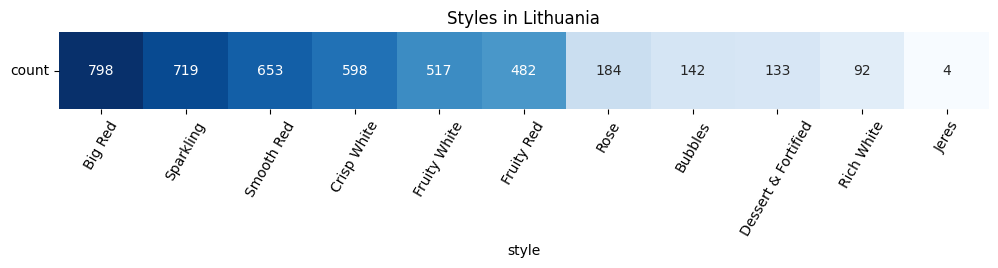

In [50]:
offset = func_param_plot(crosstab=df[df['style'].isin(pop_style)].groupby('style',
                             sort=False)['wine_id'].agg(['count']).sort_values(by='count', ascending=False).T,
                         workbook=workbook, sheet='Style', offset=0,
                         width=12, height=1, x_rotation=60, y_rotation=0,
                         path_plot='plots', title_plot='Styles in Lithuania',
                         title_sheet='Распределение вин по стилям',
                         show=True, photo_num='1')

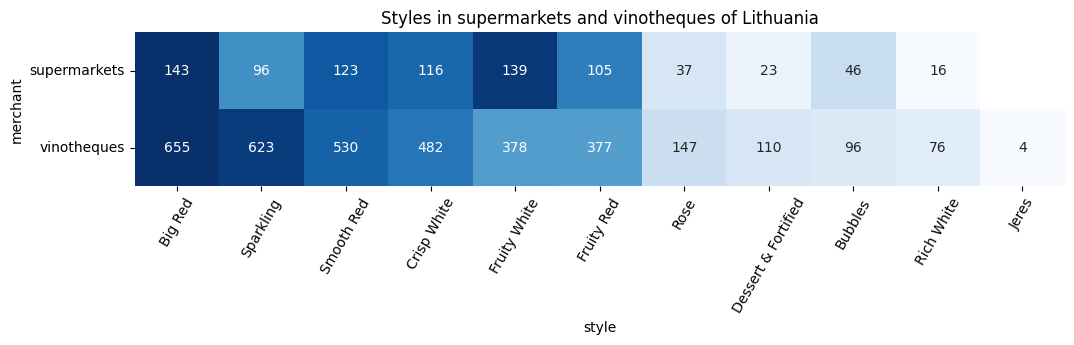

38

In [51]:
df_s = df[df['style'].isin(pop_style)].copy()
func_param_plot(crosstab=pd.crosstab(df_s['style'], df_s['merchant'], df_s['wine_id'],
                                     aggfunc='count').sort_values(by='vinotheques', ascending=False).T,
                workbook=workbook, sheet='Style', offset=offset,
                width=12, height=2, x_rotation=60, y_rotation=0,
                path_plot='plots', title_plot='Styles in supermarkets and vinotheques of Lithuania',
                show=True, photo_num='2')

### Region style

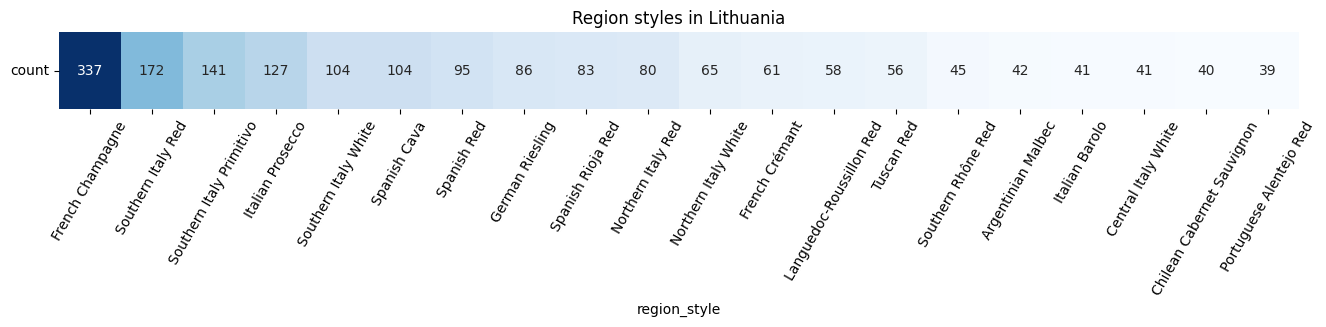

In [52]:
offset = func_param_plot(crosstab=df[df['region_style'].isin(pop_region_style)].groupby('region_style',
                             sort=False)['wine_id'].agg(['count']).sort_values(by='count', ascending=False).T,
                         workbook=workbook, sheet='Region style', offset=0,
                         width=16, height=1, x_rotation=60, y_rotation=0,
                         path_plot='plots', title_plot='Region styles in Lithuania',
                         title_sheet='Распределение вин по региональным стилям',
                         show=True, photo_num='1')

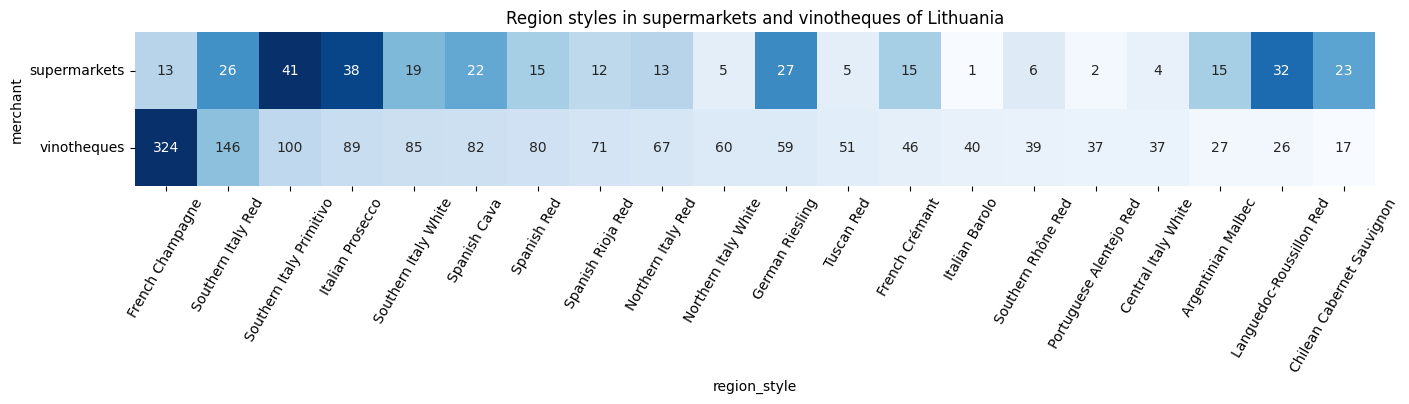

44

In [53]:
df_rs = df[df['region_style'].isin(pop_region_style)].copy()
func_param_plot(crosstab=pd.crosstab(df_rs['region_style'], df_rs['merchant'], df_rs['wine_id'],
                                     aggfunc='count').sort_values(by='vinotheques', ascending=False).T,
                workbook=workbook, sheet='Region style', offset=offset,
                width=16, height=2, x_rotation=60, y_rotation=0,
                path_plot='plots', title_plot='Region styles in supermarkets and vinotheques of Lithuania',
                show=True, photo_num='2')

### Country

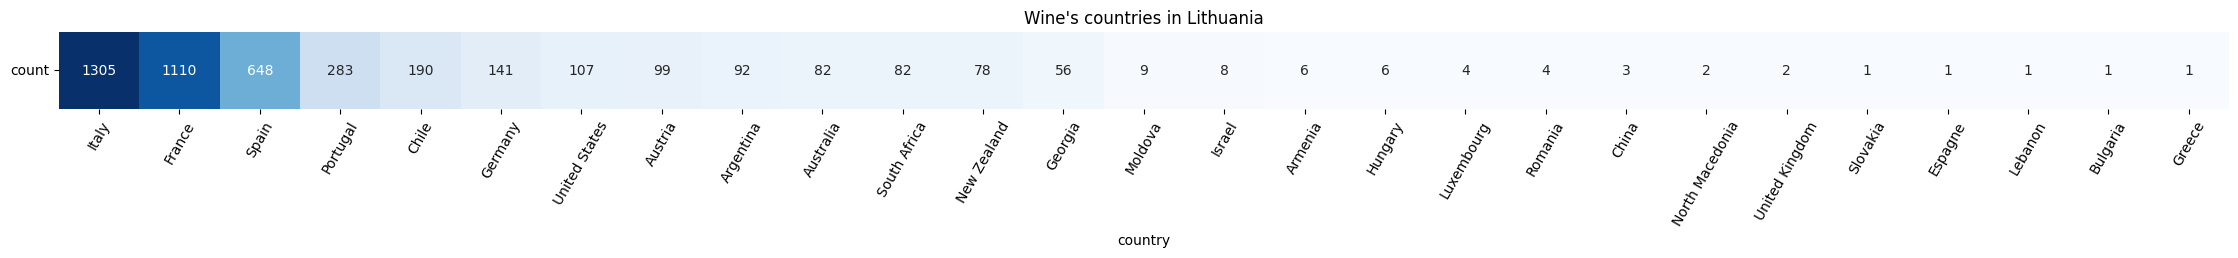

In [54]:
offset = func_param_plot(crosstab=df[df['country'].isin(pop_country)].groupby('country',
                             sort=False)['wine_id'].agg(['count']).sort_values(by='count', ascending=False).T,
                         workbook=workbook, sheet='Country', offset=0,
                         width=28, height=1, x_rotation=60, y_rotation=0,
                         path_plot='plots', title_plot="Wine's countries in Lithuania",
                         title_sheet='Распределение вин по странам',
                         show=True, photo_num='1')

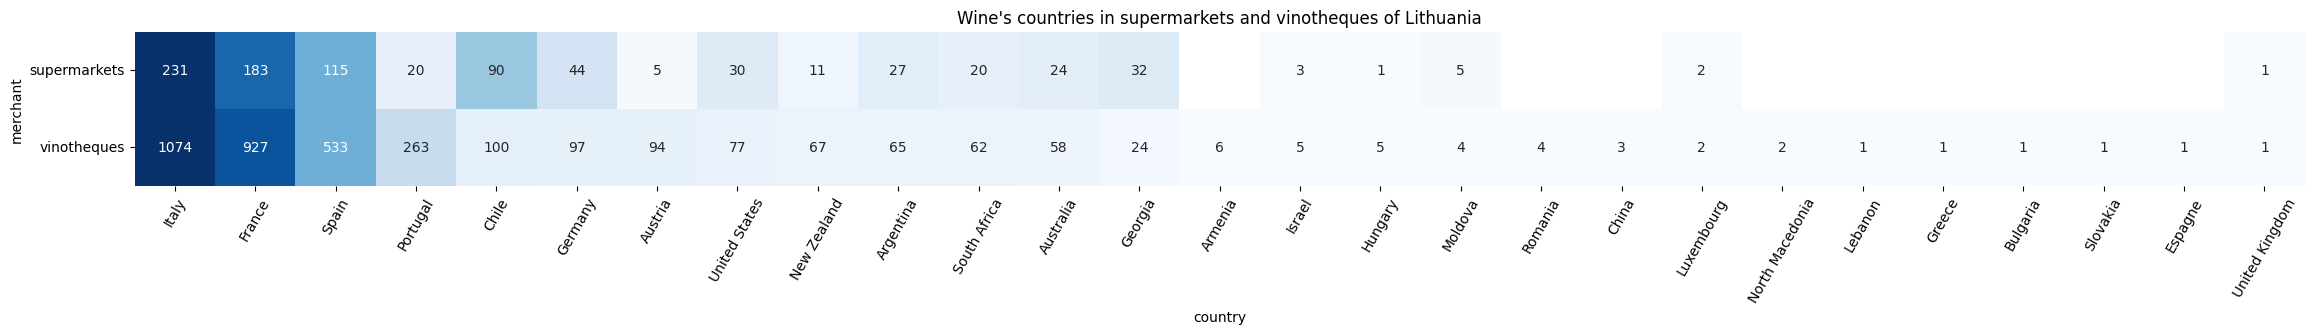

37

In [55]:
df_c = df[df['country'].isin(pop_country)].copy()
func_param_plot(crosstab=pd.crosstab(df_c['country'], df_c['merchant'], df_c['wine_id'],
                                     aggfunc='count').sort_values(by='vinotheques', ascending=False).T,
                workbook=workbook, sheet='Country', offset=offset,
                width=28, height=2, x_rotation=60, y_rotation=0,
                path_plot='plots', title_plot="Wine's countries in supermarkets and vinotheques of Lithuania",
                show=True, photo_num='2')

### Price

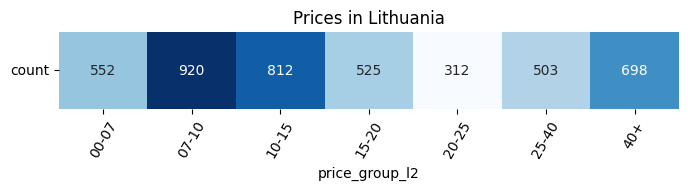

In [56]:
offset = func_param_plot(df=df, context='price_group_l2', research='wine_id', funcs=['count'],
                         workbook=workbook, sheet='Price', offset=0,
                         width=8, height=1, x_rotation=60, y_rotation=0,
                         path_plot='plots', title_plot='Prices in Lithuania',
                         title_sheet='Распределение вин по ценам',
                         show=True, photo_num='1')

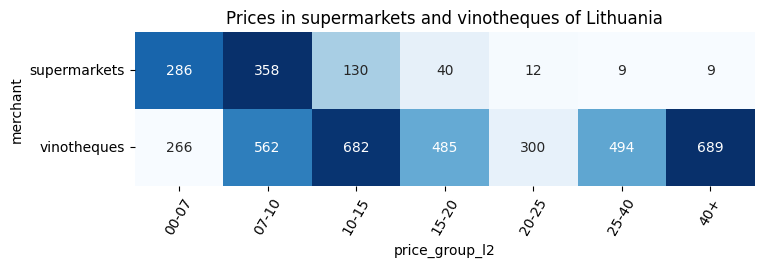

31

In [57]:
func_param_plot(df=df, context=['merchant', 'price_group_l2'], research='wine_id', funcs='count',
                workbook=workbook, sheet='Price', offset=offset,
                width=8, height=2, x_rotation=60, y_rotation=0,
                path_plot='plots', title_plot='Prices in supermarkets and vinotheques of Lithuania',
                show=True, photo_num='2')

### Grape

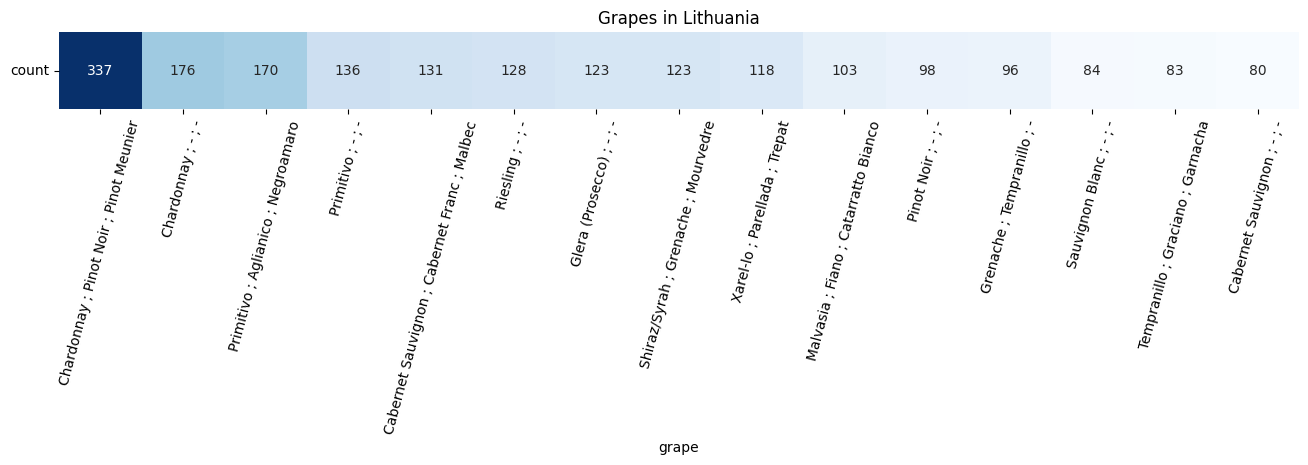

In [58]:
offset = func_param_plot(crosstab = df[df['grape'].isin(pop_grape)].groupby('grape',
                             sort=False)['wine_id'].agg(['count']).sort_values(by='count', ascending=False).T,
                         workbook=workbook, sheet='Grape', offset=0,
                         width=16, height=1, x_rotation=75, y_rotation=0,
                         path_plot='plots', title_plot='Grapes in Lithuania',
                         title_sheet='Распределение вин по винограду',
                         show=True, photo_num='1')

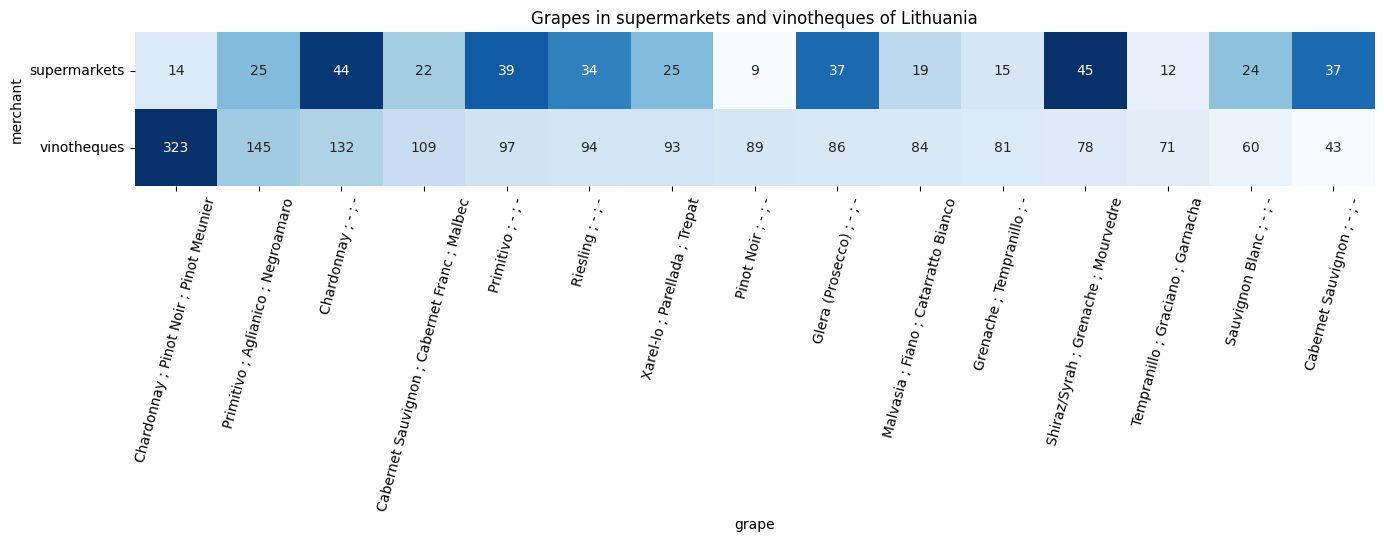

57

In [59]:
df_g = df[df['grape'].isin(pop_grape)].copy()
func_param_plot(crosstab=pd.crosstab(df_g['grape'], df_g['merchant'], df_g['wine_id'],
                                     aggfunc='count').sort_values(by='vinotheques', ascending=False).T,
                workbook=workbook, sheet='Grape', offset=offset,
                width=16, height=2, x_rotation=75, y_rotation=0,
                path_plot='plots', title_plot='Grapes in supermarkets and vinotheques of Lithuania',
                show=True, photo_num='2')

### Type

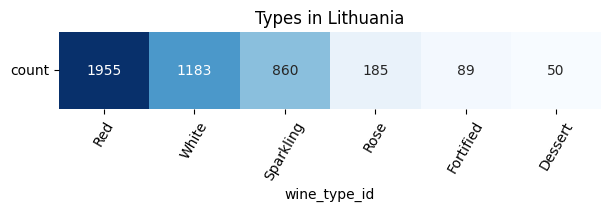

In [60]:
offset = func_param_plot(crosstab = df.groupby('wine_type_id',
                             sort=False)['wine_id'].agg(['count']).sort_values(by='count', ascending=False).T,
                         workbook=workbook, sheet='Type', offset=0,
                         width=7, height=1, x_rotation=60, y_rotation=0,
                         path_plot='plots', title_plot='Types in Lithuania',
                         title_sheet='Распределение вин по винограду',
                         show=True, photo_num='1')

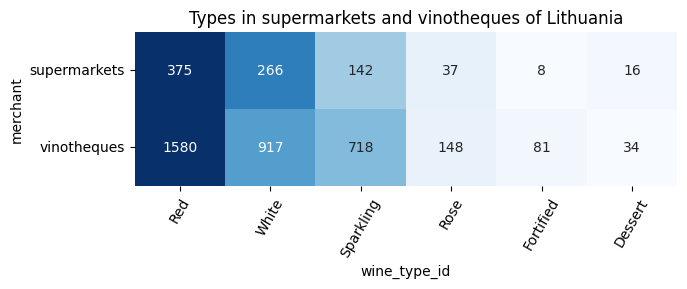

33

In [61]:
func_param_plot(crosstab=pd.crosstab(df['wine_type_id'], df['merchant'], df['wine_id'],
                                     aggfunc='count').sort_values(by='vinotheques', ascending=False).T,
                workbook=workbook, sheet='Type', offset=offset,
                width=7, height=2, x_rotation=60, y_rotation=0,
                path_plot='plots', title_plot='Types in supermarkets and vinotheques of Lithuania',
                show=True, photo_num='2')

##

In [62]:
workbook.close()